In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_loan_payback = pd.read_csv('playground-series-s5e11/train.csv')

In [61]:
df_loan_payback.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [62]:
df_loan_payback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


There are no null entries !!!

In [63]:
df_loan_payback.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442236,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


**Exploratory Data Analyis**  

In [64]:
df_loan_payback['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

There are only 0 or 1 values for loadn paid back in training data. This means our prediction is also going to be a 0 or 1 output but we need to give a probability instead.  
Logistic Regression predict will give us the 1 or 0 value by applying sigmoid (or other) function. But the function predict_proba gives the probabilities that went in to sigmoid.  

**Exploratory Data Analysis**  

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Debt consolidation'),
  Text(2, 0, 'Home'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Vacation'),
  Text(5, 0, 'Car'),
  Text(6, 0, 'Medical'),
  Text(7, 0, 'Business')])

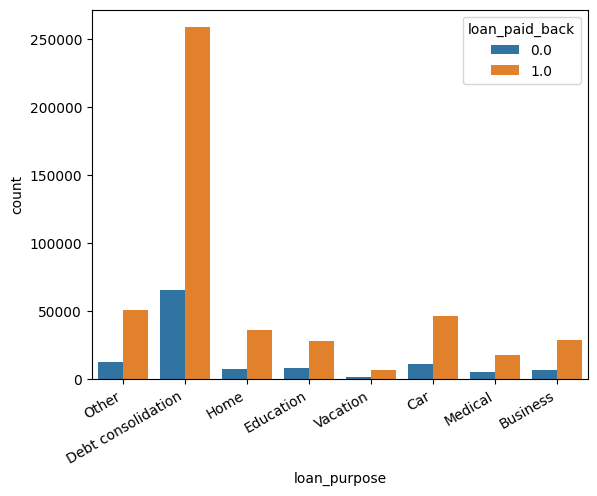

In [65]:
sns.countplot(x='loan_purpose', hue='loan_paid_back', data=df_loan_payback)
plt.xticks(rotation=30, ha='right')  # or rotation=45

([0, 1, 2], [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

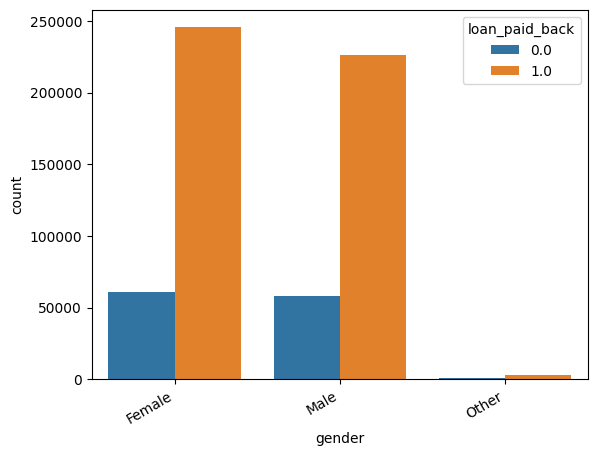

In [66]:
sns.countplot(x='gender', hue='loan_paid_back', data=df_loan_payback)
plt.xticks(rotation=30, ha='right')  # or rotation=45

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Self-employed'),
  Text(1, 0, 'Employed'),
  Text(2, 0, 'Unemployed'),
  Text(3, 0, 'Retired'),
  Text(4, 0, 'Student')])

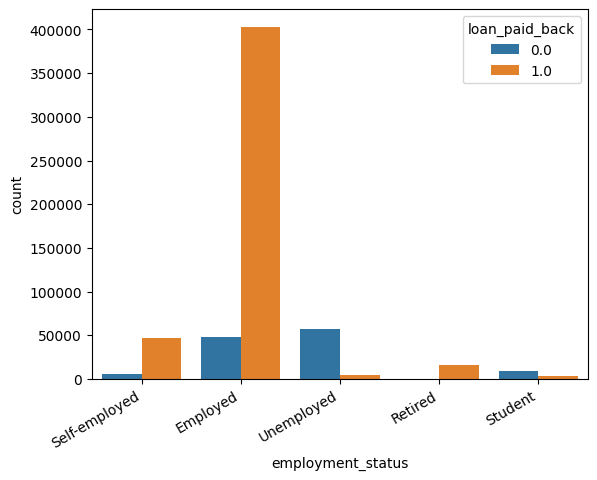

In [67]:
sns.countplot(x='employment_status', hue='loan_paid_back', data=df_loan_payback)
plt.xticks(rotation=30, ha='right')  # or rotation=45

In [68]:
df_loan_payback.groupby('employment_status')['loan_paid_back'].value_counts()

employment_status  loan_paid_back
Employed           1.0               402942
                   0.0                47703
Retired            1.0                16407
                   0.0                   46
Self-employed      1.0                47151
                   0.0                 5329
Student            0.0                 8787
                   1.0                 3144
Unemployed         0.0                57635
                   1.0                 4850
Name: count, dtype: int64

Loan repaid vs not repaid does not vary that much with different loan purposes and across different genders.   
But there is clear higher proportion of not paid back in case of the unemployed category.  
Even for student loans the proportion of not paid is higher than those who paid. 
There are very few loan defaults in retired people.  
Thus employment status has more impact of whether a loan could be repaid or not.  

<Axes: xlabel='credit_score', ylabel='debt_to_income_ratio'>

C:\Users\D8CTKCR\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\D8CTKCR\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


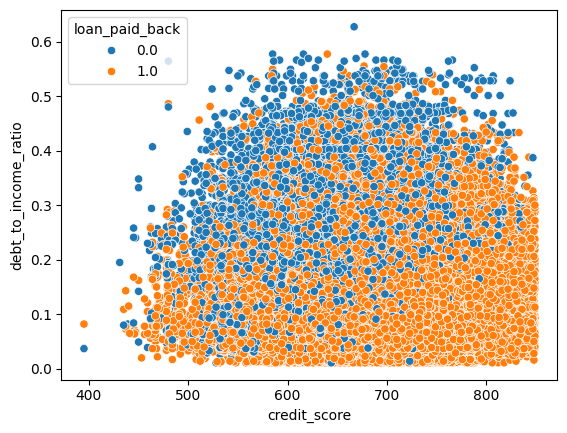

In [69]:
sns.scatterplot(data=df_loan_payback, x='credit_score', y='debt_to_income_ratio', hue='loan_paid_back')

<Axes: xlabel='credit_score', ylabel='interest_rate'>

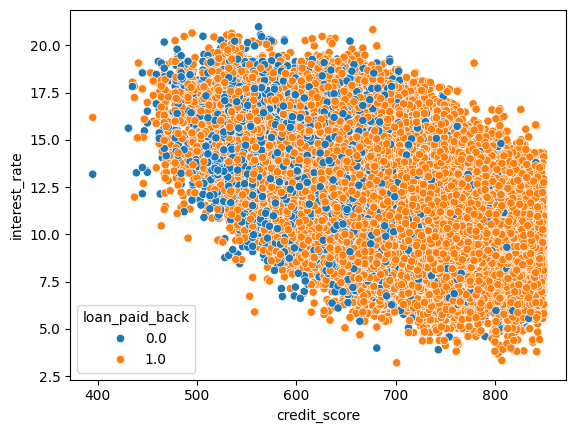

In [70]:
sns.scatterplot(data=df_loan_payback, x='credit_score', y='interest_rate', hue='loan_paid_back')

If we look at two graphs above, we can see that more blue points are present in case of higher debt to income ratio and lower credit score combination.  
We can also see that more blue points are present in case of higher interest rate and lower credit score combination.  


<Axes: xlabel='credit_score', ylabel='annual_income'>

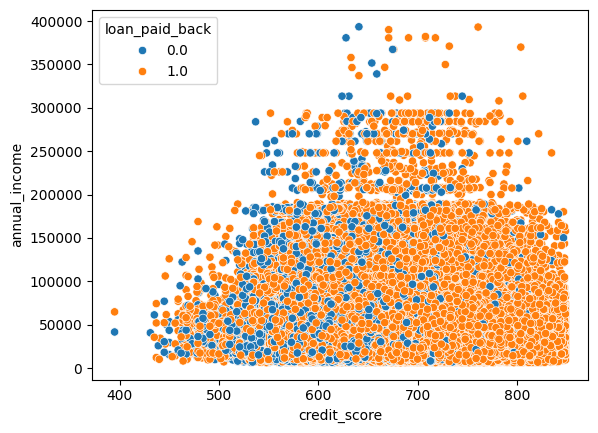

In [71]:
sns.scatterplot(data=df_loan_payback, x='credit_score', y='annual_income', hue='loan_paid_back')

<Axes: xlabel='credit_score', ylabel='loan_amount'>

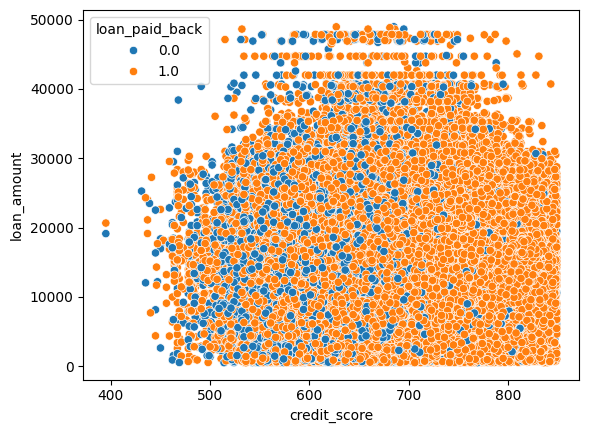

In [72]:
sns.scatterplot(data=df_loan_payback, x='credit_score', y='loan_amount', hue='loan_paid_back')

Again above two graphs show that density of blue points is more onf left half of the graph as compared to right half.  
Lower or higher income or low / high loan amount did not have much impact on whether loan was paid or not. We can see that the   
density of blue points in lower and upper half doesn't change much in either graphs.  

([0, 1, 2, 3, 4],
 [Text(0, 0, 'High School'),
  Text(1, 0, "Master's"),
  Text(2, 0, "Bachelor's"),
  Text(3, 0, 'PhD'),
  Text(4, 0, 'Other')])

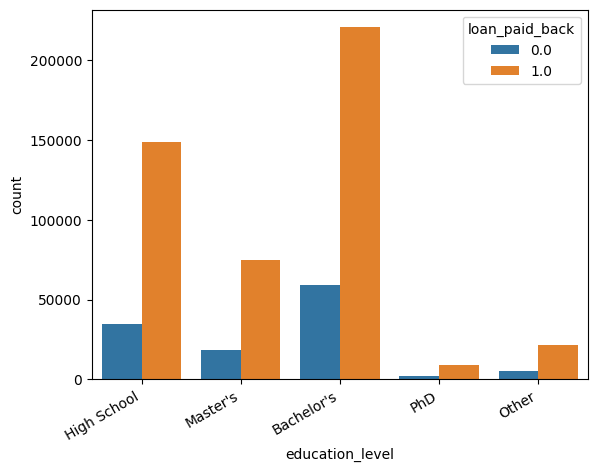

In [73]:
sns.countplot(x='education_level', hue='loan_paid_back', data=df_loan_payback)
plt.xticks(rotation=30, ha='right')  # or rotation=45

([0, 1, 2, 3],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Widowed')])

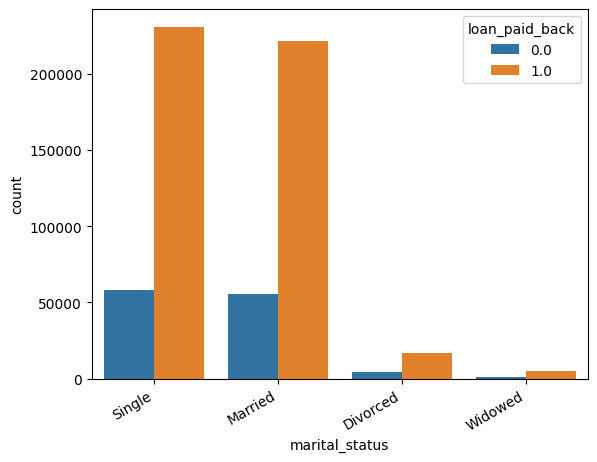

In [74]:
sns.countplot(x='marital_status', hue='loan_paid_back', data=df_loan_payback)
plt.xticks(rotation=30, ha='right')  # or rotation=45

Loan paid back or not does not vary much with marital status.  Neither does the loan payback status vary based on education level much.  

**EDA Conclusion**  
Loan repaid vs not is impacted a lot by the employment status esp with Unemployed and Students defaulting more and Retirees with very low default.  
Loan repaid vs not is not vary across different loan pupose and gender.  This is suprising especially the no variation across gender.  
Loan defaults were more frequent with high debt to loan ratio and lower credit score. 
Also more loan defaults were found with high interest rates and lower credit score.  
Absolute loan amount and annual income did not have much impact on loan repayability. This is also suprprising.   
But generally loan sanctions already take into account the income offer loans based on that.  
Martial Status and the education level does not affect the loan repayability.  

Based on above conclusion it makes sense to drop the following columsn from data for model creation    
1. id  
2. Annual Income  
3. Loan Amount  
4. Education Level  
5. Gender  
6. Loan Purpose  
7. Marital Status  

**Feature Engineering**  

In [75]:
df_loan_payback.drop(labels=['id','annual_income', 'loan_amount', 'education_level', 'gender', 'loan_purpose', 'marital_status'], 
                     inplace=True, axis=1)

In [76]:
df_loan_payback.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status,grade_subgrade,loan_paid_back
0,0.084,736,13.67,Self-employed,C3,1.0
1,0.166,636,12.92,Employed,D3,0.0
2,0.097,694,9.76,Employed,C5,1.0
3,0.065,533,16.10,Employed,F1,1.0
4,0.053,665,10.21,Employed,D1,1.0


In [77]:
df_loan_payback['grade'] = df_loan_payback['grade_subgrade'].apply(lambda x : x[0])

In [78]:
df_loan_payback.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status,grade_subgrade,loan_paid_back,grade
0,0.084,736,13.67,Self-employed,C3,1.0,C
1,0.166,636,12.92,Employed,D3,0.0,D
2,0.097,694,9.76,Employed,C5,1.0,C
3,0.065,533,16.10,Employed,F1,1.0,F
4,0.053,665,10.21,Employed,D1,1.0,D


<Axes: xlabel='grade', ylabel='count'>

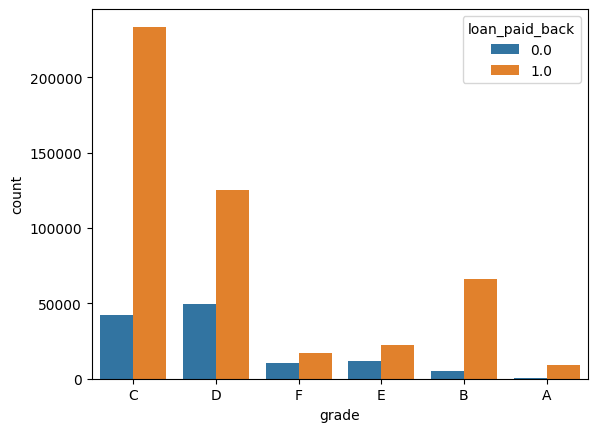

In [79]:
sns.countplot(data=df_loan_payback, x='grade', hue='loan_paid_back')

There is some variation of loan repaybitlity with different grade types --- grades B and C have somewhat lower defaults proportionately.   
Plotting this count plot with grade subgrade will make it more clear.  

<Axes: xlabel='grade_subgrade', ylabel='count'>

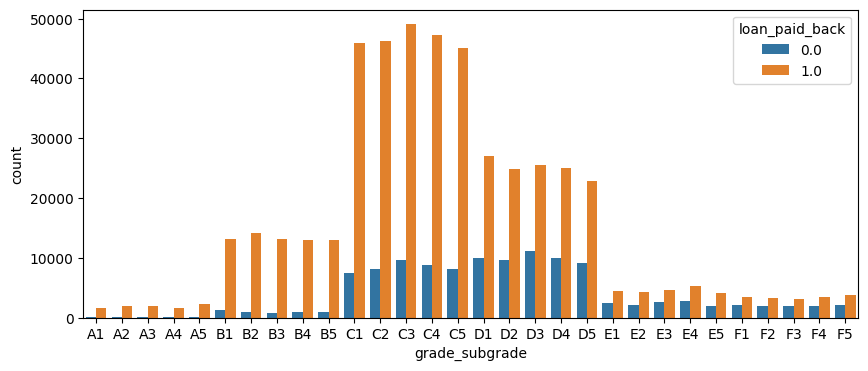

In [83]:
ord = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 
      'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5']
plt.figure(figsize=(10, 4))
sns.countplot(data=df_loan_payback, x='grade_subgrade', hue='loan_paid_back', order=ord)

In [84]:
df_loan_payback.drop(labels=['grade_subgrade'], axis=1, inplace=True)

In [85]:
df_loan_payback.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status,loan_paid_back,grade
0,0.084,736,13.67,Self-employed,1.0,C
1,0.166,636,12.92,Employed,0.0,D
2,0.097,694,9.76,Employed,1.0,C
3,0.065,533,16.10,Employed,1.0,F
4,0.053,665,10.21,Employed,1.0,D


**Test Train Split, dummies and Model Training**  

In [96]:
from sklearn.preprocessing import StandardScaler

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df_loan_payback.drop(labels=['loan_paid_back'], axis=1, inplace=False)

In [90]:
y = df_loan_payback['loan_paid_back']

In [105]:
X.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status,grade
0,0.084,736,13.67,Self-employed,C
1,0.166,636,12.92,Employed,D
2,0.097,694,9.76,Employed,C
3,0.065,533,16.10,Employed,F
4,0.053,665,10.21,Employed,D


In [106]:
X = pd.get_dummies(data=X, columns=['employment_status', 'grade'], drop_first=True, dtype=np.int32)

In [107]:
X.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,grade_B,grade_C,grade_D,grade_E,grade_F
0,0.084,736,13.67,0,1,0,0,0,1,0,0,0
1,0.166,636,12.92,0,0,0,0,0,0,1,0,0
2,0.097,694,9.76,0,0,0,0,0,1,0,0,0
3,0.065,533,16.10,0,0,0,0,0,0,0,0,1
4,0.053,665,10.21,0,0,0,0,0,0,1,0,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [113]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(593994, 12)
(445495, 12)
(148499, 12)
(593994,)
(445495,)
(148499,)


In [114]:
scaler = StandardScaler()

In [115]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [116]:
scaler.transform(X_train)

array([[-0.40390325,  1.51589652, -0.66538697, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [ 0.22295751,  1.17331706, -0.82978271, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [ 0.6019896 , -0.08881781, -1.02406859, ..., -0.64731244,
        -0.24831513, -0.21955363],
       ...,
       [ 0.8060838 , -0.12487881,  0.14662837, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [ 0.87897459, -1.13458671,  1.06325918, ...,  1.54484903,
        -0.24831513, -0.21955363],
       [-0.40390325, -0.03472632, -1.49732907, ..., -0.64731244,
        -0.24831513, -0.21955363]], shape=(445495, 12))

In [117]:
X_train = scaler.transform(X_train)

In [118]:
X_test = scaler.transform(X_test)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logistic_regression = LogisticRegression()

In [121]:
logistic_regression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
y_pred = logistic_regression.predict(X_test)

In [123]:
print(y_pred.shape)

(148499,)


In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
print('Classification Report\n')
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.71     29769
         1.0       0.91      0.97      0.94    118730

    accuracy                           0.90    148499
   macro avg       0.88      0.79      0.82    148499
weighted avg       0.90      0.90      0.89    148499



In [126]:
print('Classification Report\n')
print(confusion_matrix(y_test, y_pred))

Classification Report

[[ 17953  11816]
 [  3059 115671]]


In [127]:
y_pred_prob = logistic_regression.predict_proba(X_test)

In [133]:
y_pred_prob # probabilites of 0 and 1 for each X_test element.

array([[0.95723544, 0.04276456],
       [0.19171136, 0.80828864],
       [0.15074759, 0.84925241],
       ...,
       [0.9961057 , 0.0038943 ],
       [0.1933806 , 0.8066194 ],
       [0.04357434, 0.95642566]], shape=(148499, 2))

The problem asks us to give us loan repay probability --- so it should be y_pred_prob[:, 1] 

In [134]:
y_pred_prob[:, 1]

array([0.04276456, 0.80828864, 0.84925241, ..., 0.0038943 , 0.8066194 ,
       0.95642566], shape=(148499,))

**Conclusion**  
The classification is better for class 1 --- precission = 91%, recall = 97%.  
But for class 0, the classification is not so good, precission = 85% and recall = 60%   

Remember Precission = TP / (TP + FP) and Recall = TP / (TP + FN)    

So this means that for class 0, there are lots of false negatives --- lots of zeros getting wrongly predicted as 1.   
This can be confirmed from the first row second column of confusion matrix --- 11816 0's getting classified as 1 wrongly.   
Total zeros in the original sample is 119500 and with 25% split it should be around 29875.   
Sum of top row of confusion matrix is 17953 + 11816 = 29769  

**Competition Test Data Prediction**  

In [192]:
df_loan_payback_test = pd.read_csv('playground-series-s5e11/test.csv')

In [193]:
df_loan_payback_test

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
...,...,...,...,...,...,...,...,...,...,...,...,...
254564,848558,92835.97,0.068,744,29704.00,13.48,Female,Single,Bachelor's,Employed,Debt consolidation,B2
254565,848559,48846.47,0.091,634,20284.33,9.58,Female,Married,High School,Employed,Debt consolidation,D4
254566,848560,20668.52,0.096,718,26387.55,9.00,Male,Single,Master's,Employed,Debt consolidation,C4
254567,848561,34105.09,0.094,739,11107.36,9.81,Male,Single,Bachelor's,Employed,Business,C2


In [194]:
df_loan_payback_test.drop(labels=['annual_income', 'loan_amount', 'education_level', 'gender', 'loan_purpose', 'marital_status'], 
                     inplace=True, axis=1)  # we need id in the end

In [195]:
df_loan_payback_test.head()

,id,debt_to_income_ratio,credit_score,interest_rate,employment_status,grade_subgrade
0,593994,0.049,626,14.73,Employed,D5
1,593995,0.093,732,12.85,Employed,C1
2,593996,0.367,611,13.29,Employed,D1
3,593997,0.110,671,9.57,Employed,C3
4,593998,0.081,688,12.80,Employed,C1


In [196]:
df_loan_payback_test['grade'] = df_loan_payback_test['grade_subgrade'].apply(lambda x : x[0])

In [197]:
df_loan_payback_test.drop(labels=['grade_subgrade'], axis=1, inplace=True)

In [198]:
df_loan_payback_test.head()  # df_loan_payback_test already dpoes not have loan paid back as that is what is to be predicted !!!

,id,debt_to_income_ratio,credit_score,interest_rate,employment_status,grade
0,593994,0.049,626,14.73,Employed,D
1,593995,0.093,732,12.85,Employed,C
2,593996,0.367,611,13.29,Employed,D
3,593997,0.110,671,9.57,Employed,C
4,593998,0.081,688,12.80,Employed,C


In [199]:
df_loan_payback_test = pd.get_dummies(data=df_loan_payback_test, columns=['employment_status', 'grade'], drop_first=True, dtype=np.int32)

In [201]:
df_loan_payback_test.head(7)

,id,debt_to_income_ratio,credit_score,interest_rate,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,grade_B,grade_C,grade_D,grade_E,grade_F
0,593994,0.049,626,14.73,0,0,0,0,0,0,1,0,0
1,593995,0.093,732,12.85,0,0,0,0,0,1,0,0,0
2,593996,0.367,611,13.29,0,0,0,0,0,0,1,0,0
3,593997,0.110,671,9.57,0,0,0,0,0,1,0,0,0
4,593998,0.081,688,12.80,0,0,0,0,0,1,0,0,0
5,593999,0.060,675,13.74,0,0,0,0,0,1,0,0,0
6,594000,0.061,714,13.87,0,0,0,0,0,1,0,0,0


In [203]:
X_cmptn_test = df_loan_payback_test.drop(labels=['id'], axis=1)  # we do not need id for getting predictions from the model

In [204]:
X_cmptn_test.head()

,debt_to_income_ratio,credit_score,interest_rate,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,grade_B,grade_C,grade_D,grade_E,grade_F
0,0.049,626,14.73,0,0,0,0,0,0,1,0,0
1,0.093,732,12.85,0,0,0,0,0,1,0,0,0
2,0.367,611,13.29,0,0,0,0,0,0,1,0,0
3,0.110,671,9.57,0,0,0,0,0,1,0,0,0
4,0.081,688,12.80,0,0,0,0,0,1,0,0,0


In [205]:
X_cmptn_test = scaler.transform(X_cmptn_test)

In [206]:
X_cmptn_test

array([[-1.04534217, -0.99034272,  1.18281972, ...,  1.54484903,
        -0.24831513, -0.21955363],
       [-0.40390325,  0.92089008,  0.24626215, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [ 3.59051184, -1.2608002 ,  0.46545648, ...,  1.54484903,
        -0.24831513, -0.21955363],
       ...,
       [-0.36016878,  0.66846311, -1.67168819, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [-0.38932509,  1.04710357, -1.26817136, ..., -0.64731244,
        -0.24831513, -0.21955363],
       [-0.03944932, -1.02640372, -0.35652224, ...,  1.54484903,
        -0.24831513, -0.21955363]], shape=(254569, 12))

In [207]:
df_cmptn_predict = pd.Series(logistic_regression.predict(X_cmptn_test), name='competition prediction')

In [208]:
df_cmptn_predict.value_counts()

competition prediction
1.0    218334
0.0     36235
Name: count, dtype: int64

In [209]:
df_cmptn_predict_probabs =  pd.DataFrame(logistic_regression.predict_proba(X_cmptn_test), columns=['probability 0', 'probability 1'])

In [210]:
df_cmptn_predict_probabs

,probability 0,probability 1
0,0.081659,0.918341
1,0.024494,0.975506
2,0.857527,0.142473
3,0.069740,0.930260
4,0.041256,0.958744
...,...,...
254564,0.009282,0.990718
254565,0.105267,0.894733
254566,0.028756,0.971244
254567,0.020727,0.979273


In [213]:
df_loan_payback_test_output = pd.concat([df_loan_payback_test, df_cmptn_predict_probabs], axis=1)

In [216]:
df_loan_payback_test_output.head(7)

,id,debt_to_income_ratio,credit_score,interest_rate,employment_status_Retired,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,grade_B,grade_C,grade_D,grade_E,grade_F,probability 0,probability 1
0,593994,0.049,626,14.73,0,0,0,0,0,0,1,0,0,0.081659,0.918341
1,593995,0.093,732,12.85,0,0,0,0,0,1,0,0,0,0.024494,0.975506
2,593996,0.367,611,13.29,0,0,0,0,0,0,1,0,0,0.857527,0.142473
3,593997,0.110,671,9.57,0,0,0,0,0,1,0,0,0,0.069740,0.930260
4,593998,0.081,688,12.80,0,0,0,0,0,1,0,0,0,0.041256,0.958744
5,593999,0.060,675,13.74,0,0,0,0,0,1,0,0,0,0.039776,0.960224
6,594000,0.061,714,13.87,0,0,0,0,0,1,0,0,0,0.022292,0.977708


In [221]:
df_submission = df_loan_payback_test_output[['id', 'probability 1']]

In [223]:
df_submission.head()

,id,probability 1
0,593994,0.918341
1,593995,0.975506
2,593996,0.142473
3,593997,0.930260
4,593998,0.958744


In [224]:
df_submission.rename(columns={'probability 1' : 'loan_paid_back'}, inplace=True)

C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_16304\2138600892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission.rename(columns={'probability 1' : 'loan_paid_back'}, inplace=True)


In [225]:
df_submission.head()

,id,loan_paid_back
0,593994,0.918341
1,593995,0.975506
2,593996,0.142473
3,593997,0.930260
4,593998,0.958744


In [227]:
df_submission.to_csv('playground-series-s5e11/loan_paid_back_probability.csv')